分布の時系列データをプロットする  
(参考)https://seaborn.pydata.org/examples/kde_joyplot.html

In [77]:
# 20個のガウス分布を作成。標準偏差は全て１、平均は1〜20。
dists=np.random.normal(size=(20,1000))
for i in range(len(dists)):
    dists[i] = dists[i]+i

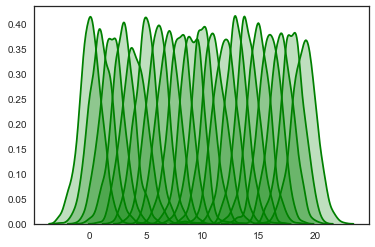

In [83]:
import seaborn as sns
%matplotlib inline

# seabornのdistplotでプロットする。これだと重なって見づらい。
for d in dists:
    sns.distplot(d, hist=False, color="g", kde_kws={"shade": True})

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def seriesdistplot(dists, xlabel='value', distlabels=None, vspace=-0.5, font_scale=3):
    '''
    縦方向にシフトして分布をプロットする。
    dists.shape=(分布の数、分布ごとのデータ点数)
    '''
    nb_dist = len(dists)
    
    columns = ['label', xlabel]
    df = pd.DataFrame(columns=columns)
    
    if distlabels is None:
        for i,d in enumerate(dists):
            '''
            distsに格納されている分布に順に00, 01, ...とラベルをつける。このとき、zfillで１桁の数字の手前に0を入れておく。
            これが無いと0,1,2,3,...,10,11という列が0,1,10,11,2,3,...のようにソートされてしまう。
            '''
            foo = pd.DataFrame(np.vstack(([str(i).zfill(2)]*len(d),d)).transpose(1,0), columns=columns)
            df = pd.concat([df,foo])
    else:
        for d,l in zip(dists,distlabels):
            foo = pd.DataFrame(np.vstack(([l]*len(d),d)).transpose(1,0), columns=columns)
            df = pd.concat([df,foo])
            
    # 描画領域の背景を透過にしておく。
    sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)}, font_scale=font_scale)
    
    # カラーパレットの定義。
    pal = sns.cubehelix_palette(nb_dist, rot=-.25, light=.7)
    
    # FacetGridを使ってまとめてプロットする。
    g = sns.FacetGrid(df, row="label", hue="label", aspect=nb_dist, size=1., palette=pal)
    g.map(sns.kdeplot, xlabel, clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
    g.map(sns.kdeplot, xlabel, clip_on=False, color="w", lw=2, bw=.2) # bordar
    g.map(plt.axhline, y=0, lw=2, clip_on=False) # horizon

    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color, 
                ha="left", va="center", transform=ax.transAxes)

    g.map(label, xlabel)

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=vspace)

    # Remove axes details that don't play will with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)

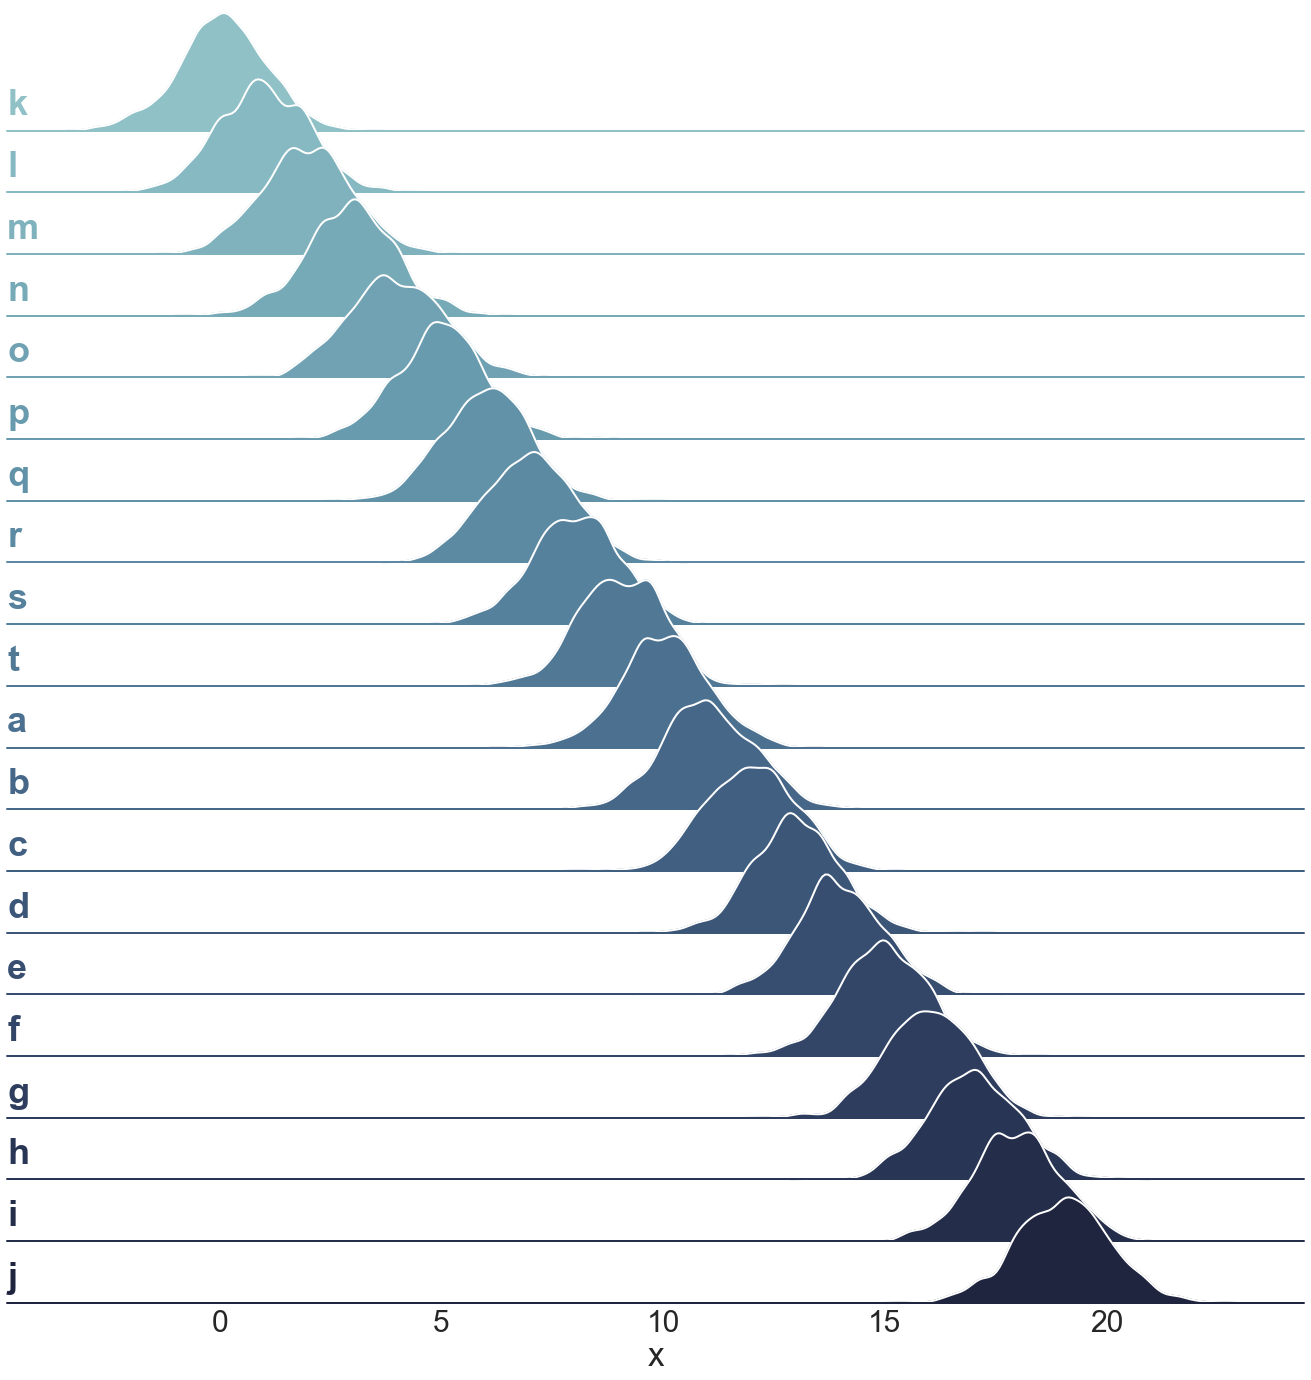

In [95]:
%matplotlib inline
#distlabels = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t']
distlabels = ['k','l','m','n','o','p','q','r','s','t','a','b','c','d','e','f','g','h','i','j',]
#df=seriesdistplot(dists, xlabel='x')
df=seriesdistplot(dists, xlabel='x', distlabels=distlabels)
